In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
class_a = pd.read_csv('class_a.csv')

In [7]:
inv = pd.read_csv('inventory.csv')

In [8]:
inv.head()

,New SKU,Upstream Contact,Brand,Type,Location,WEEK,W6,W7,W8,W9,...,W2,W3,W4,W5,W6.1,W7.1,W8.1,W9.1,W10.1,W11.1
0,GN1063121-Z-WH2203,Saffron Art & Craft,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GN1063121-Z-WH2305,Suncity Handicrafts Pvt Ltd,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,GN1576961-Z-WH19706,WOODENMOOD,Mudramark,HB-SW,Mumbai,NaN,0,0,0,0,...,0,8,0,0,1,0,0,0,0,0
3,GN1576961-Z-WH32492,Woodenmood,Mudramark,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,10,10,9,8,7,5
4,GN7828171-Z-WH19566,Incredible Handicrafts and Minerals,Woodsworth,HB-SW,Mumbai,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
class_a.head()

,class A
0,GN2430461-Z-WH22695
1,GN9937061-Z-WH15338
2,GN2644961-Z-WH32491
3,GN5327661-Z-WH10719
4,GN8819471-Z-WH10868


In [10]:
class_a.columns = ['New SKU'] #replacing that column

In [11]:
class_a.head()

,New SKU
0,GN2430461-Z-WH22695
1,GN9937061-Z-WH15338
2,GN2644961-Z-WH32491
3,GN5327661-Z-WH10719
4,GN8819471-Z-WH10868


In [12]:
inv_a = pd.merge(inv,class_a, how='inner', on= 'New SKU')

In [13]:
inv_a.to_csv('inv_adata.csv')

**Forecast**

In [14]:
inv_a = pd.read_csv("class_aFinal.csv")

In [15]:
inv_a.head()

,week,inv
0,07-02-2019,13.0
1,14-02-2019,16.0
2,21-02-2019,13.0
3,28-02-2019,9.0
4,07-03-2019,18.0


In [16]:
#Convert month into date and time
inv_a['week'] = pd.to_datetime(inv_a['week'])

In [17]:
#week as a index
inv_a.set_index('week', inplace = True)

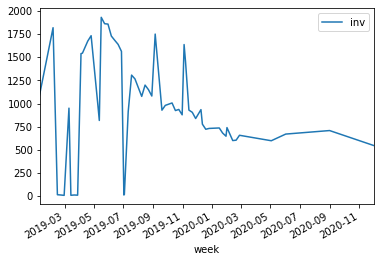

In [18]:
inv_a.plot()
#In the below graph the data doesnot show any seasonality and also its not stationary since there is no trend in the series

In [19]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [20]:
test_result = adfuller(inv_a['inv'])
#adfuller gives 5 different values (ADF Test statistic', 'p-value', 'Lags used', 'Number of observations used)
#it will defined in labels downwards (Dickey-Fuller Test)

In [21]:
#H0 - it is not stationary (null hypothesis)
 #H1 - It is stationary

#if p is less than 0.05, then we can reject the null hypothesis. so it is stationary
def ad_fuller(sales):
    result = adfuller(sales) #it calculates all the relevant 4 values
    labels = ['ADF Test statistic', 'p-value', '#Lags used', 'Number of observations used'] #creating a output
    for value,label in zip(result, labels): #using zip to collect all values result and the labels altogether
        print (label+' : '+str(value) )
    if result[1] <= 0.05:
        print("We reject the null hypothesis. Data is stationary.")
    else:
        print("We can not reject null hypothesis. Data is not stationary")

In [22]:
ad_fuller(inv_a['inv'])

ADF Test statistic : -3.209947736067987
p-value : 0.019416037926540772
#Lags used : 6
Number of observations used : 51
We reject the null hypothesis. Data is stationary.


**Auto Regressive Model**

In [23]:
from pandas.plotting import autocorrelation_plot

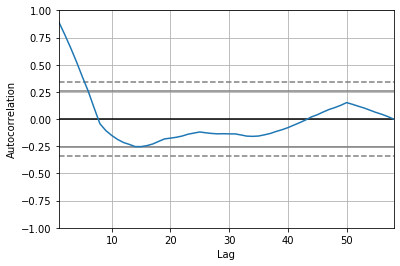

In [24]:
autocorrelation_plot(inv_a['inv'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #autocorelation or partial auto correlation
import statsmodels.api as sm

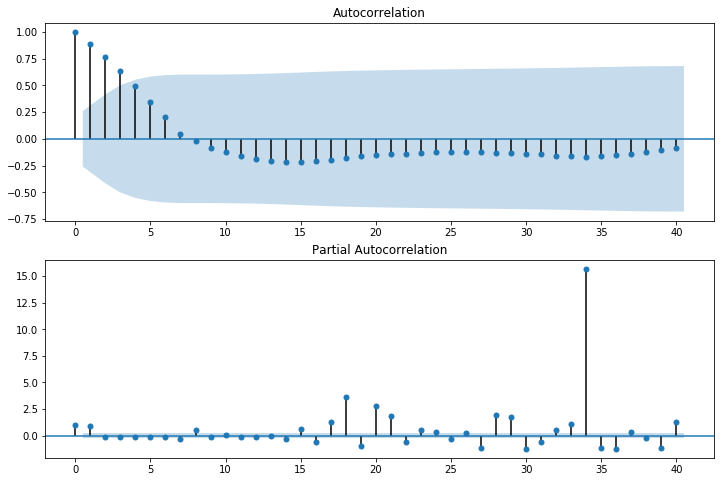

In [26]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(inv_a['inv'].iloc[1:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(inv_a['inv'].iloc[1:], lags = 40, ax = ax2)
# for ARIMA, we need p,q,d
#p = 1 from partial coorelation FOR AR value
#q = 1 from Auto correlation model (no exponential decrease in 1st graph. so we are more inclined towards auto regressive)1
#d = 0 from differencing done only 1 time

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
model = ARIMA(inv_a['inv'], order = (1,0,1)) #(p,d,q)
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    inv   No. Observations:                   58
Model:                     ARMA(1, 1)   Log Likelihood                -392.849
Method:                       css-mle   S.D. of innovations            207.827
Date:                Fri, 03 Apr 2020   AIC                            793.697
Time:                        17:42:57   BIC                            801.939
Sample:                             0   HQIC                           796.908
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        770.1961    329.722      2.336      0.023     123.953    1416.439
ar.L1.inv      0.9198      0.053     17.264      0.000       0.815       1.024
ma.L1.inv      0.0924      0.131      0.708      0.482      -0.163       0.348
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0872           +0.0000j            1.0872            0.0000
MA.1          -10.8241           +0.0000j           10.8241            0.5000
-----------------------------------------------------------------------------
"""

In [30]:
inv_a.tail(15)

,inv
week,
2019-05-12,818.0
2019-12-12,778.0
2019-12-19,723.0
2019-12-26,732.0
2020-02-01,741.0
2020-09-01,709.0
2020-01-16,737.0
2020-01-23,682.0
2020-01-30,648.0


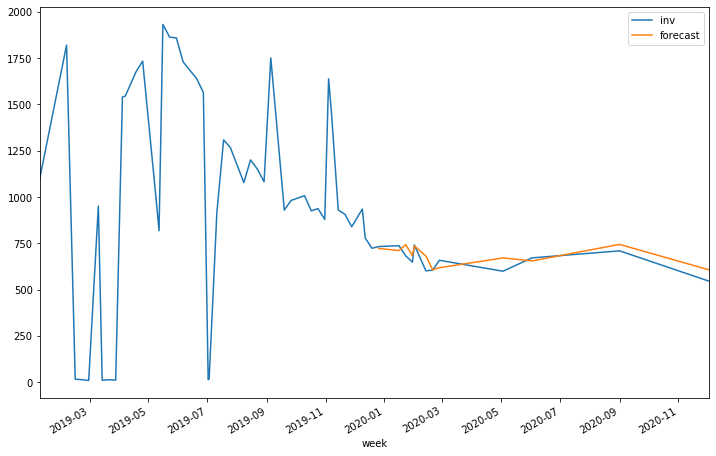

In [31]:
inv_a['forecast']=model_fit.predict(start='2019-12-26',end='2020-12-03')
inv_a[['inv','forecast']].plot(figsize=(12,8))

**Metrics**

In [32]:
farima = inv_a['forecast']['2019-12-26' : ]
actual = inv_a['inv']['2019-12-26' :]

In [33]:
actual

week
2019-12-26    732.0
2020-02-01    741.0
2020-09-01    709.0
2020-01-16    737.0
2020-01-23    682.0
2020-01-30    648.0
2020-06-02    671.0
2020-02-13    601.0
2020-02-20    605.0
2020-02-27    658.0
2020-05-03    599.0
2020-12-03    545.0
Name: inv, dtype: float64

In [34]:
farima

week
2019-12-26    722.064162
2020-02-01    735.982852
2020-09-01    743.806257
2020-01-16    710.694857
2020-01-23    742.093942
2020-01-30    683.525149
2020-06-02    654.523186
2020-02-13    680.481893
2020-02-20    607.233548
2020-02-27    618.049266
2020-05-03    670.693702
2020-12-03    606.113553
Name: forecast, dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(actual, farima)
mae = mean_absolute_error(actual, farima)
print('Mean Squared Error of Amberville Brand Using Arima: %f' % mse)
print('Mean Absolute Error of Amberville Brand Using Arima: %f' % mae)

Mean Squared Error of Amberville Brand Using Arima: 1997.117227
Mean Absolute Error of Amberville Brand Using Arima: 36.886143


**6 months**

In [36]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=24)[0]

In [37]:
class_a_outofsample = pd.DataFrame(data=forecast, columns=['Forecast']) #putting into dataframe

In [38]:
class_a_outofsample

,Forecast
0,557.424066
1,574.497255
2,590.200462
3,604.643617
4,617.927829
5,630.146093
6,641.383942
7,651.720047
8,661.226765
9,669.970648


**The End**